# Exploratory Data Analysis
This is the EDA for my project. The idea is to classify the position of the player given parformance stats of his average game. I have collected this data from the [NBA Reference](https://www.basketball-reference.com/). This data contains ~10,000 individual players stats per game for seasons 2000-2020. It is collected by my [data_parser.py](https://github.com/bohdan-dutchak/NBAdrafter/blob/main/data_parser.py) script

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn

In [91]:
df = pd.read_csv('data/all_seasons.csv')

## Data Exploration
In this part I describe the dataset gereraly, it's features univarely.

### Features description:

In [92]:
print(df.columns)

Index(['Player', 'Pos', 'Ht', 'Wt', 'Exp', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G',
       'Season'],
      dtype='object')


|Name|Data type|Feature type|Measurement|Description|
|---|---|---|---|---|
|Player|string|categirical|none|Full player' name|
|**Pos**|string|categorical (**target**)|5 unique classes|Players position in a team:<br> Center, Power Forward, Small Forward, Shooting Guard, Point Guard|
|Ht|float|numerical|cm|Players height|
|Wt|float|numerical|kg|Players weight|
|Exp|int|numerical|years|Years in the NBA|
|Age|int|numerical|full years|Players age|
|G|int|numerical|none|Games played in the season|
|GS|int|numerical|none|Games started|
|MP|float|numerical|minutes|Minutes played per game|
|FG|float|numerical|field goals|Field goals per game|
|FGA|float|numerical|attemps|Field goal attempts per game|
|FG%|float|numerical|percentage|% of successful fied goals in the season|
|3P|float|numerical|shots|3-pointers per game|
|3PA|float|numerical|attemps|3-point goal attempts per game|
|3P%|float|numerical|percentage|% of successful 3-point goals in the season|
|2P|float|numerical|shots|2-pointers per game|
|2PA|float|numerical|attemps|2-point goal attempts per game|
|2P%|float|numerical|percentage|% of successful 2-point goals in the season|
|eFG%|float|numerical|percentage|Effective Field Goal Percentage|
|FT|float|numerical|shots|Free throws per game|
|FTA|float|numerical|attemps|Free throws attempts per game|
|FT%|float|numerical|percentage|% of successful Free throws in the season|
|ORB|float|numerical|rebounds|Offensive Rebounds Per Game|
|DRB|float|numerical|rebounds|Deffensive Rebounds Per Game|
|TRB|float|numerical|rebounds|Total Rebounds Per Game|
|AST|float|numerical|assists|Assists per game|
|STL|float|numerical|steals|Steals per game|
|BLK|float|numerical|blocks|blocks per game|
|TOV|float|numerical|blocks|Turnovers per game|
|PF|float|numerical|fouls|Personal fouls per game|
|PTS/G|float|numerical|points|Points per game|
|Season|int|categorical|year|season|



In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ht,11071.0,200.339536,9.192770,160.0,193.000,201.000,208.000,231.0
Wt,11071.0,99.898293,12.428882,61.0,91.000,100.000,109.000,163.0
Exp,11071.0,4.645380,4.073686,0.0,1.000,4.000,7.000,21.0
Age,11071.0,26.691536,4.293728,18.0,23.000,26.000,30.000,44.0
G,11071.0,46.913558,26.596150,1.0,23.000,51.000,72.000,82.0
GS,11071.0,22.773914,28.028636,0.0,0.000,8.000,42.000,82.0
MP,11071.0,19.903396,10.038786,0.0,11.600,19.200,28.050,43.7
FG,11071.0,2.974989,2.155647,0.0,1.300,2.500,4.200,12.2
FGA,11071.0,6.683597,4.588675,0.0,3.100,5.600,9.300,27.8
FG%,11006.0,0.433379,0.103571,0.0,0.395,0.436,0.480,1.0


In [94]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
Player,11071,2033,Vince Carter,23
Pos,11071,5,PF,2300


The dataset is has 11071 observations and 32 features, 3 of them are categorical: Player, Pos and Season, all the other are numerical. Among the 11071 observations, only 2033 are unique. It means that the data is only about 2033 unique players and their performance in different seasons. I decided to collect seasons separately, since a player could change his position between the seasons.

Also we can see, that some rows are missing. Missing values analysis shows, that None type is only in the rows, where player took 0 attempts of some sort of shot. Since the table could not divide by zero, we don't have any value there, so we can fill it manually.

In [95]:
print(df.isnull().sum()[df.isnull().sum()>0])
df.fillna(0,inplace=True)

FG%       65
3P%     1743
2P%      113
eFG%      65
FT%      557
dtype: int64


We also need to know how good the data is balanced and what is it's distributions in order to make further decisions.

<AxesSubplot:title={'center':'Balance of classes'}, xlabel='Position'>

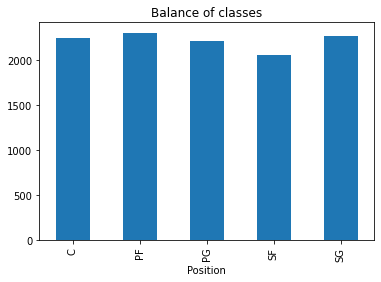

In [96]:
df.groupby('Pos').count()['Player'].plot.bar(title='Balance of classes', xlabel='Position')

In [97]:
df.groupby('Pos').mean().transpose()

Pos,C,PF,PG,SF,SG
Ht,210.817898,205.983478,187.561284,201.763184,195.406443
Wt,113.845058,107.550435,85.111262,99.723145,92.894086
Exp,4.977738,4.805217,4.609227,4.532227,4.291262
Age,26.992876,26.666957,26.858435,26.523438,26.406884
G,46.669190,46.568261,46.454545,47.777344,47.173433
GS,23.472395,21.548261,22.715513,24.263672,22.036187
MP,17.700980,19.195478,20.782044,21.058203,20.903883
FG,2.614782,2.959087,3.029444,3.085449,3.195190
FGA,5.231879,6.403087,7.206649,7.081787,7.536981
FG%,0.481895,0.444626,0.402354,0.418347,0.405302


In [86]:
df['Ht'] -= 160
df['Wt'] -= 61
df.drop(df[df['G']<10].index, inplace=True)

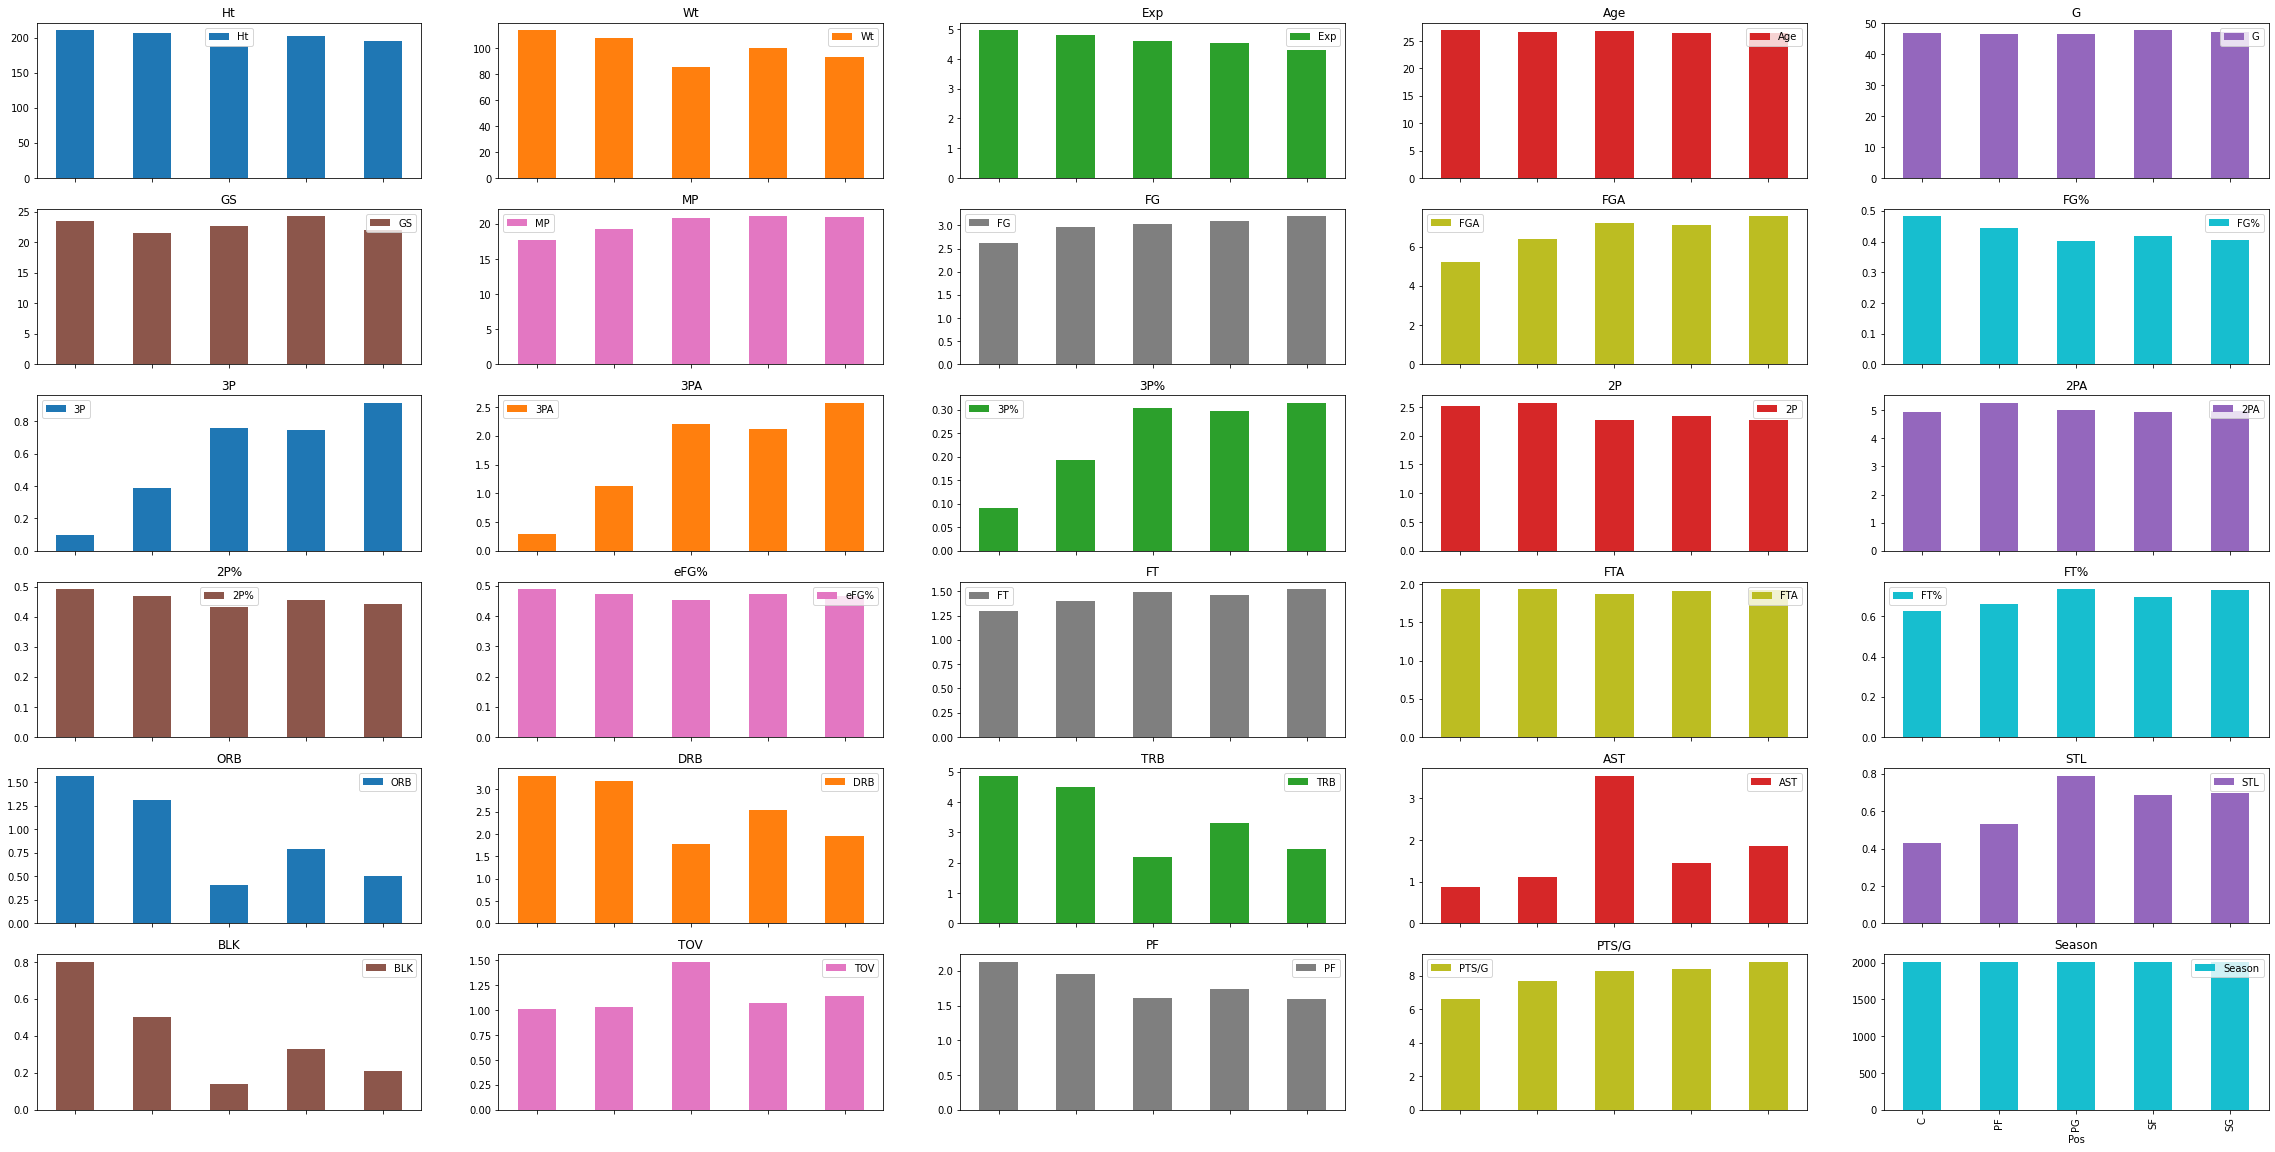

In [98]:
ax = df.groupby('Pos').mean().plot.bar(figsize=(40,20), subplots=True)
fig = plt.gcf()

gs = gridspec.GridSpec(6,5)
for i in range(6):
    for j in range(5):
        k = i+j*6
        if k < len(ax):
            ax[k].set_position(gs[k].get_position(fig))

plt.show()

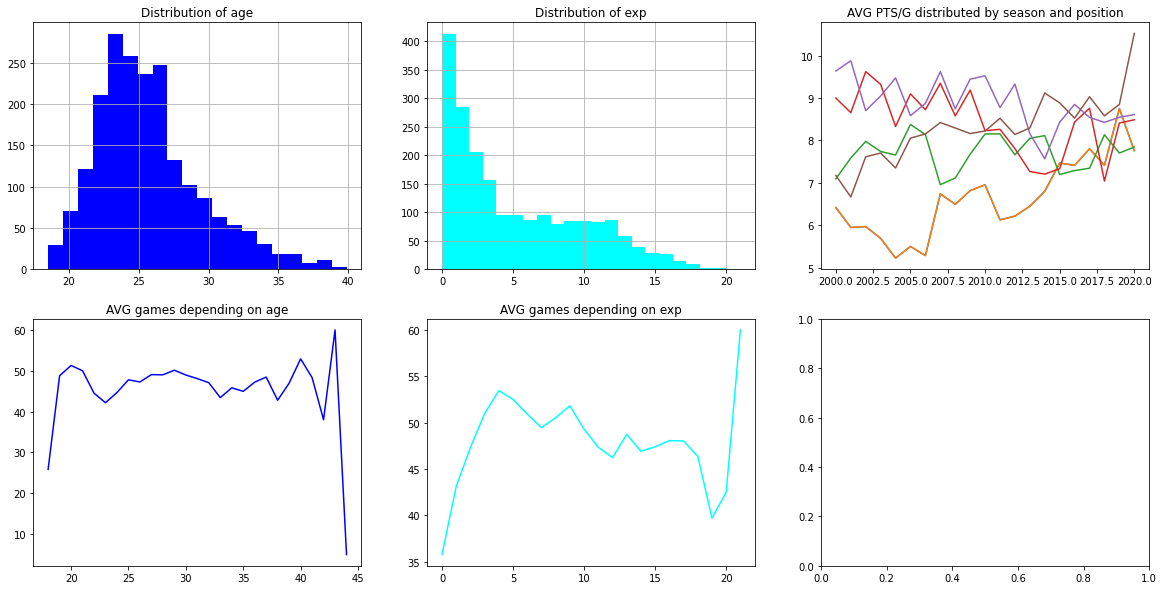

In [156]:

plt.subplots(2, 3, figsize = (20,10))
plt.subplot(2,3,1, title='Distribution of age')
df.groupby('Player').mean()['Age'].hist(bins=20, color='blue')

plt.subplot(2,3,2, title='Distribution of exp')
df.groupby('Player').max()['Exp'].hist(bins=len(df.groupby('Player').max()['Exp'].unique()), color='cyan')

plt.subplot(2,3,5, title='AVG games depending on exp')
plt.plot(range(22), df.groupby('Exp').mean()['G'], color='cyan')

plt.subplot(2,3,4, title='AVG games depending on age')
plt.plot(range(18,45), df.groupby('Age').mean()['G'], color='blue')

plt.subplot(2,3,3, title='AVG PTS/G distributed by season and position')
plt.plot(df[df['Pos']=='C'].groupby('Season').mean()['PTS/G'], label='C')
plt.plot(df[df['Pos']=='C'].groupby('Season').mean()['PTS/G'], label='C')
plt.plot(df[df['Pos']=='PF'].groupby('Season').mean()['PTS/G'], label='PF')
plt.plot(df[df['Pos']=='SF'].groupby('Season').mean()['PTS/G'], label='SF')
plt.plot(df[df['Pos']=='SG'].groupby('Season').mean()['PTS/G'], label='SG')
plt.plot(df[df['Pos']=='PG'].groupby('Season').mean()['PTS/G'], label='PG')
#plt.legend(['C','PF','PG','SF','SG'])